In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from tratamento_module import *

In [2]:
tratamento = Tratamento()

In [3]:
df = tratamento.amostras_import()
amostras = df.copy()
amostras = tratamento.get_frequencies_from(amostras,freq = 900)
X,y = tratamento.get_samples(amostras = df)

In [4]:
X_train,X_test,y_train,y_test = tratamento.training_test(X,y)

In [5]:
pca = tratamento.PCA_t(X_train, n_components=4)

In [6]:
print(df.shape[0])
print(df.loc[df['Diagnostico']=='Positivo'].shape[0])
print(df.loc[df['Diagnostico']=='Negativo'].shape[0])


365
54
311


In [7]:
am_p = df.loc[df['Diagnostico']=='Positivo'].sample(1)
am_p = am_p.drop(['Diagnostico'],axis = 1)
am_n = df.loc[df['Diagnostico']=='Negativo'].sample(1)
am_n = am_n.drop(['Diagnostico'],axis = 1)

x_axis = df.columns.to_numpy()[:-1]
x_axis = x_axis.astype(float)

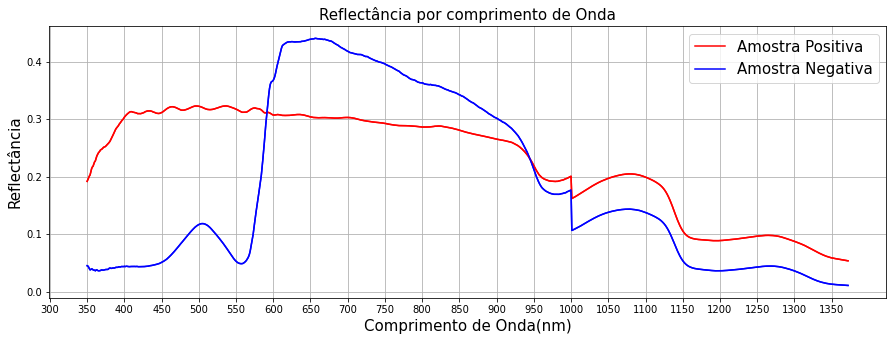

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 5))
ax.plot(x_axis,am_p.iloc[0].to_numpy(), label = 'Amostra Positiva',color = 'Red')
ax.plot(x_axis, am_n.iloc[0].to_numpy(), label = 'Amostra Negativa',color='Blue')
ax.plot(x_axis,am_p.iloc[0].to_numpy(), color = 'Red')
ax.plot(x_axis, am_n.iloc[0].to_numpy(),color = 'Blue' )
ax.set_xticks(np.arange(300,np.amax(x_axis),50))
ax.grid()
ax.legend(fontsize = 15)
ax.set_xlabel("Comprimento de Onda(nm)",fontsize = 15)
ax.set_ylabel("Reflectância",fontsize = 15)
ax.set_title("Reflectância por comprimento de Onda",fontsize = 15)
fig.savefig('Figuras/amostras.png',dpi=fig.dpi)

In [9]:
amostras.shape

(365, 474)

In [10]:
x_sav = savgol_filter(x=amostras.drop(columns = ['Diagnostico']),window_length=11,polyorder=4,deriv=1)

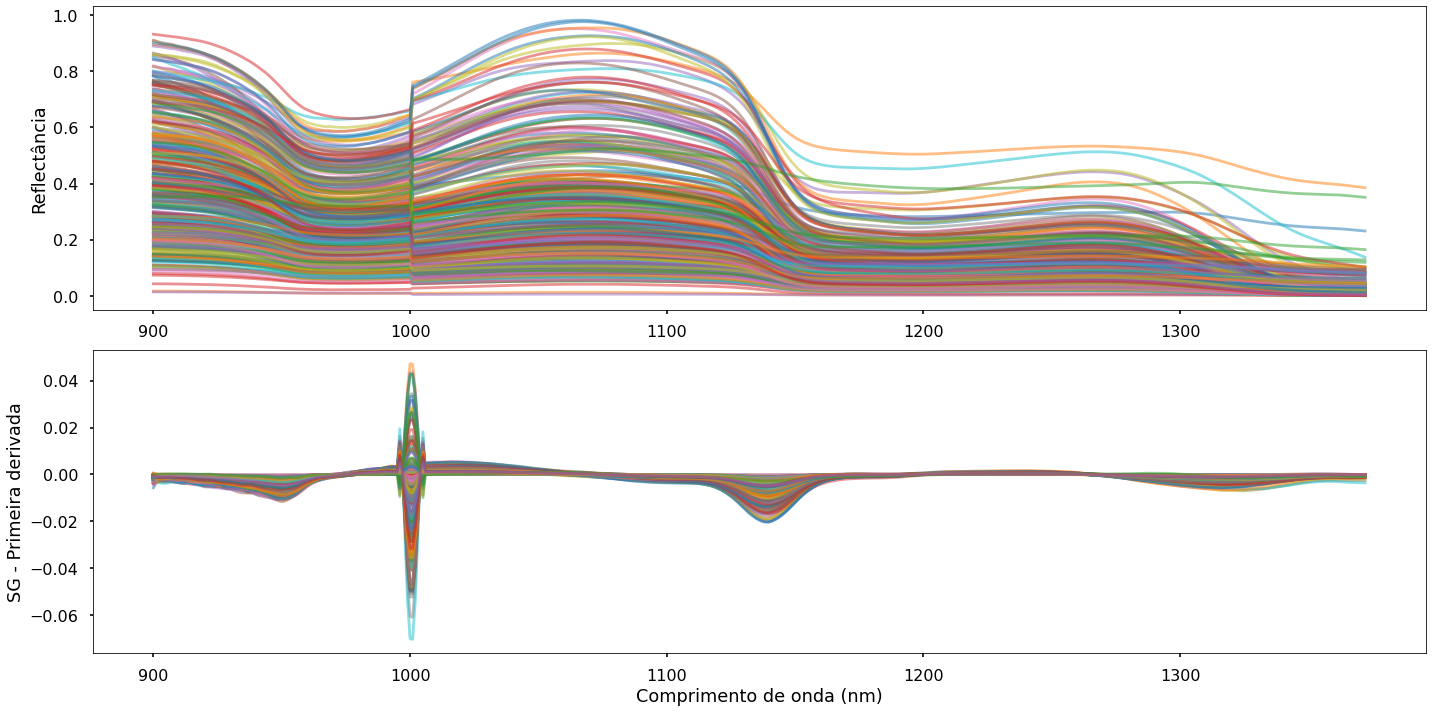

In [11]:

with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(20, 10))
    ax1 = plt.subplot(211)
    ax1.plot(amostras.drop(columns = ['Diagnostico']).columns,amostras.drop(columns = ['Diagnostico']).values.T , alpha=0.5)
#     ax1.set_xlabel("Wavelengths (nm)")
    ax1.set_ylabel("Reflectância")
    
    ax2 = plt.subplot(212, sharex=ax1)
    ax2.plot(amostras.drop(columns = ['Diagnostico']).columns, x_sav.T, alpha=0.5)
    ax2.set_xlabel("Comprimento de onda (nm)")
    ax2.set_ylabel("SG - Primeira derivada")

    plt.tight_layout()
    plt.plot()
    plt.savefig('savitzky.png',bbox_inches = 'tight')


In [12]:
print(np.sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

0.9925427870938617
[0.70559953 0.23746085 0.04359963 0.00588278]


In [13]:
x_train_positivo = X_train.loc[y_train == '1']
x_train_negativo = X_train.loc[y_train == '0']

transform_x_p = pca.transform(X=x_train_positivo.to_numpy())
transform_x_n = pca.transform(X=x_train_negativo.to_numpy())

In [14]:
transform_x_n_2 = transform_x_n[:,:2]
transform_x_p_2 = transform_x_p[:,:2]

In [15]:
dados_pca_p = pd.DataFrame(data = transform_x_p_2,columns=['PC1','PC2'])
dados_pca_p['Diagnostico'] = 'Positivo'

dados_pca_n = pd.DataFrame(data = transform_x_n_2,columns=['PC1','PC2'])
dados_pca_n['Diagnostico'] = 'Negativo'

dados_pca = dados_pca_p.append(dados_pca_n)

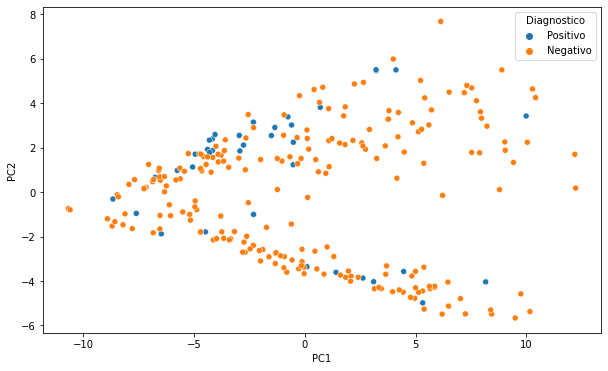

In [16]:
fig,ax = plt.subplots()
sns.scatterplot(data = dados_pca,x='PC1',y='PC2',hue = 'Diagnostico',ax = ax)
fig.set_size_inches(10, 6)
fig.savefig('PCA2.png')